In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [81]:
data=pd.read_csv("Country-data.csv")
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [82]:
features = data.drop(columns=['country'])

In [83]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

In [84]:
print(type(scaled_features))
print(scaled_features.shape)
import numpy as np
print(np.isnan(scaled_features).any())


<class 'numpy.ndarray'>
(167, 9)
False


In [85]:
#Elbow Method for Choosing K
wcss = []
k_values = range(1,11)#11
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

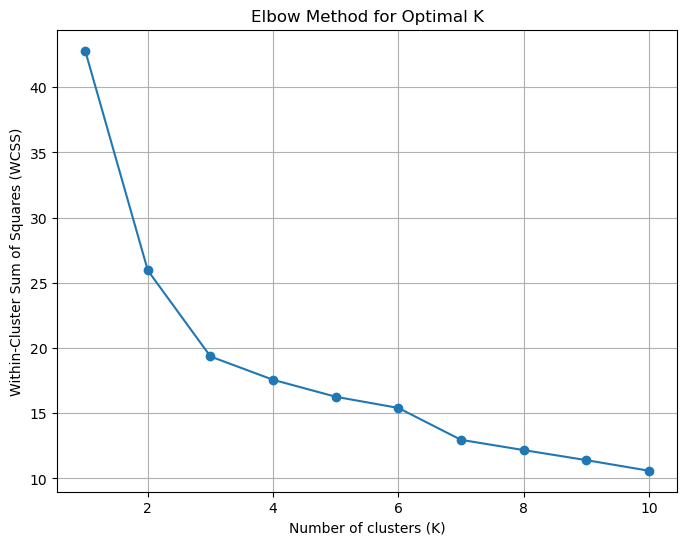

In [86]:
# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [110]:
 #Apply K-Means Clustering
optimal_k = 3 # Choose the optimal K based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [111]:
 #Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f"Silhouette Score for K={optimal_k}: {silhouette_avg}")

Silhouette Score for K=3: 0.33976487765323604


In [89]:
# Add cluster labels to the original dataset
data['Cluster'] = clusters

In [90]:
# Analyze cluster centers
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=features.columns)

In [91]:
# Display results
print("Cluster Centers:")
print(centroid_df)

Cluster Centers:
   child_mort    exports     health    imports        income  inflation  \
0   30.887273  35.328891   5.439273  41.426653  10539.454545   9.870382   
1   10.004651  51.730233   7.580233  57.309302  18662.790698   3.582070   
2  102.120000  20.342000  10.666000  61.540000   1558.400000   5.665000   
3    5.034615  57.650000   9.059615  47.711538  51646.153846   3.021962   
4   94.242424  30.163333   5.178788  37.333333   3715.424242  14.165000   

   life_expec  total_fer          gdpp  
0   70.412727   2.728000   4955.127273  
1   76.039535   1.713721  12289.069767  
2   55.710000   4.484000    873.700000  
3   80.546154   1.789231  49819.230769  
4   60.275758   5.370303   1818.636364  


In [114]:
df0=data[data["Cluster"]==0]
df1=data[data["Cluster"]==1]
df2=data[data["Cluster"]==2]